In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays
using Statistics
using CairoMakie
#using JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2,  el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end
Hs(x, k) = Statistics.mean(x) + k * Statistics.std(x)

Hs (generic function with 1 method)

In [3]:
function peaks(x)
    peaks_ = Float64[]
    len_ = length(x)
    for i in range(2, len_ - 1, step = 1)
        if x[i-1] < x[i] > x[i+1]
            push!(peaks_, x[i])
        end
    end
    return peaks_
end

peaks (generic function with 1 method)

In [4]:
function Tr(x, drop_size = 2)
    println("variable before truncate length: ", length(x)); flush(stdout)
    x = x[floor(Int, length(x) / drop_size):end ]
    println("variable  after truncate length: ", length(x)); flush(stdout)
    return x
end
Hs(x) = Statistics.mean(x) + 6 * Statistics.std(x)
function calc_number_EEs(x)
    threshold = Hs(x)
    counts = length(x[x.>=threshold])
    return counts
end

calc_number_EEs (generic function with 1 method)

In [58]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= -0.17; k2 = -0.17
k = 0.3318 # 0.300
tspan = (0.0, 300000.0)

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
condition = sol[:, end]

6-element SVector{6, Float64} with indices SOneTo(6):
   0.7915409864914831
  -3.4418643850530137
   3.6597889387775697
  -1.4892108040696115
 -10.203434893250526
   3.9493763667820114

In [5]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= -0.17; k2 = -0.17
k = 0.3012
tspan = (0.0, 500000.0)

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
condition = SA[-0.04471856203156402,
   0.9930479522101472,
   4.4905558028862576,
  -1.6784956837442249,
 -12.985436806629679,
   4.185702440686755]

6-element SVector{6, Float64} with indices SOneTo(6):
  -0.04471856203156402
   0.9930479522101472
   4.4905558028862576
  -1.6784956837442249
 -12.985436806629679
   4.185702440686755

In [6]:
prob = ODEProblem(HR, condition, tspan, p)
sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 7693798-element Vector{Float64}:
      0.0
      0.04452508065632299
      0.07116019984925097
      0.1125543674946804
      0.14460564836211337
      0.1856924383827826
      0.22356623036231132
      0.26733114993257595
      0.311567777823844
      0.3606887646166103
      0.41295452260715354
      0.4710819007892869
      0.5370446360878129
      ⋮
 499999.31838980905
 499999.38464950956
 499999.4508433796
 499999.51698253804
 499999.5830787911
 499999.649141366
 499999.7151794247
 499999.78120240424
 499999.84721710504
 499999.9132318513
 499999.9792522134
 500000.0
u: 7693798-element Vector{SVector{6, Float64}}:
 [-0.04471856203156402, 0.9930479522101472, 4.4905558028862576, -1.6784956837442249, -12.985436806629679, 4.185702440686755]
 [-0.044041124057114245, 0.9929220615346447, 4.492019279525195, -1.680130377287224, -12.990523482168078, 4.18366

In [7]:
xsum = sol[1,:] + sol[4,:]
xsum = xsum[floor(Int, length(xsum) / 2):end ]

3846900-element Vector{Float64}:
 -1.6012559078699564
 -1.6026236327046632
 -1.60398472724265
 -1.6053391740553655
 -1.6066870194232397
 -1.6080283120343926
 -1.6093631061944766
 -1.6106914552541194
 -1.6120134546555789
 -1.613329174659774
 -1.614638710256608
 -1.615942184793744
 -1.61723970397215
  ⋮
 -2.0944249594477795
 -2.097628896857431
 -2.100832419355764
 -2.1040356683294017
 -2.1072388192158975
 -2.1104419227314524
 -2.113645026139409
 -2.1168481894244033
 -2.120051343645793
 -2.1232544924808567
 -2.1264575044114116
 -2.127463945230691

In [20]:
time = sol.t[floor(Int, length(sol.t) / 2):end ]

3846900-element Vector{Float64}:
 246663.45755716015
 246663.52011947212
 246663.5828405668
 246663.64572772835
 246663.70879072626
 246663.77203900344
 246663.83548181033
 246663.89912787583
 246663.9629874696
 246664.02706917288
 246664.09138226794
 246664.1559369484
 246664.22074205274
      ⋮
 499999.31838980905
 499999.38464950956
 499999.4508433796
 499999.51698253804
 499999.5830787911
 499999.649141366
 499999.7151794247
 499999.78120240424
 499999.84721710504
 499999.9132318513
 499999.9792522134
 500000.0

In [8]:
Hs_ = Statistics.mean(xsum) + 6 * Statistics.std(xsum)

3.333714202596865

In [9]:
CairoMakie.activate!()

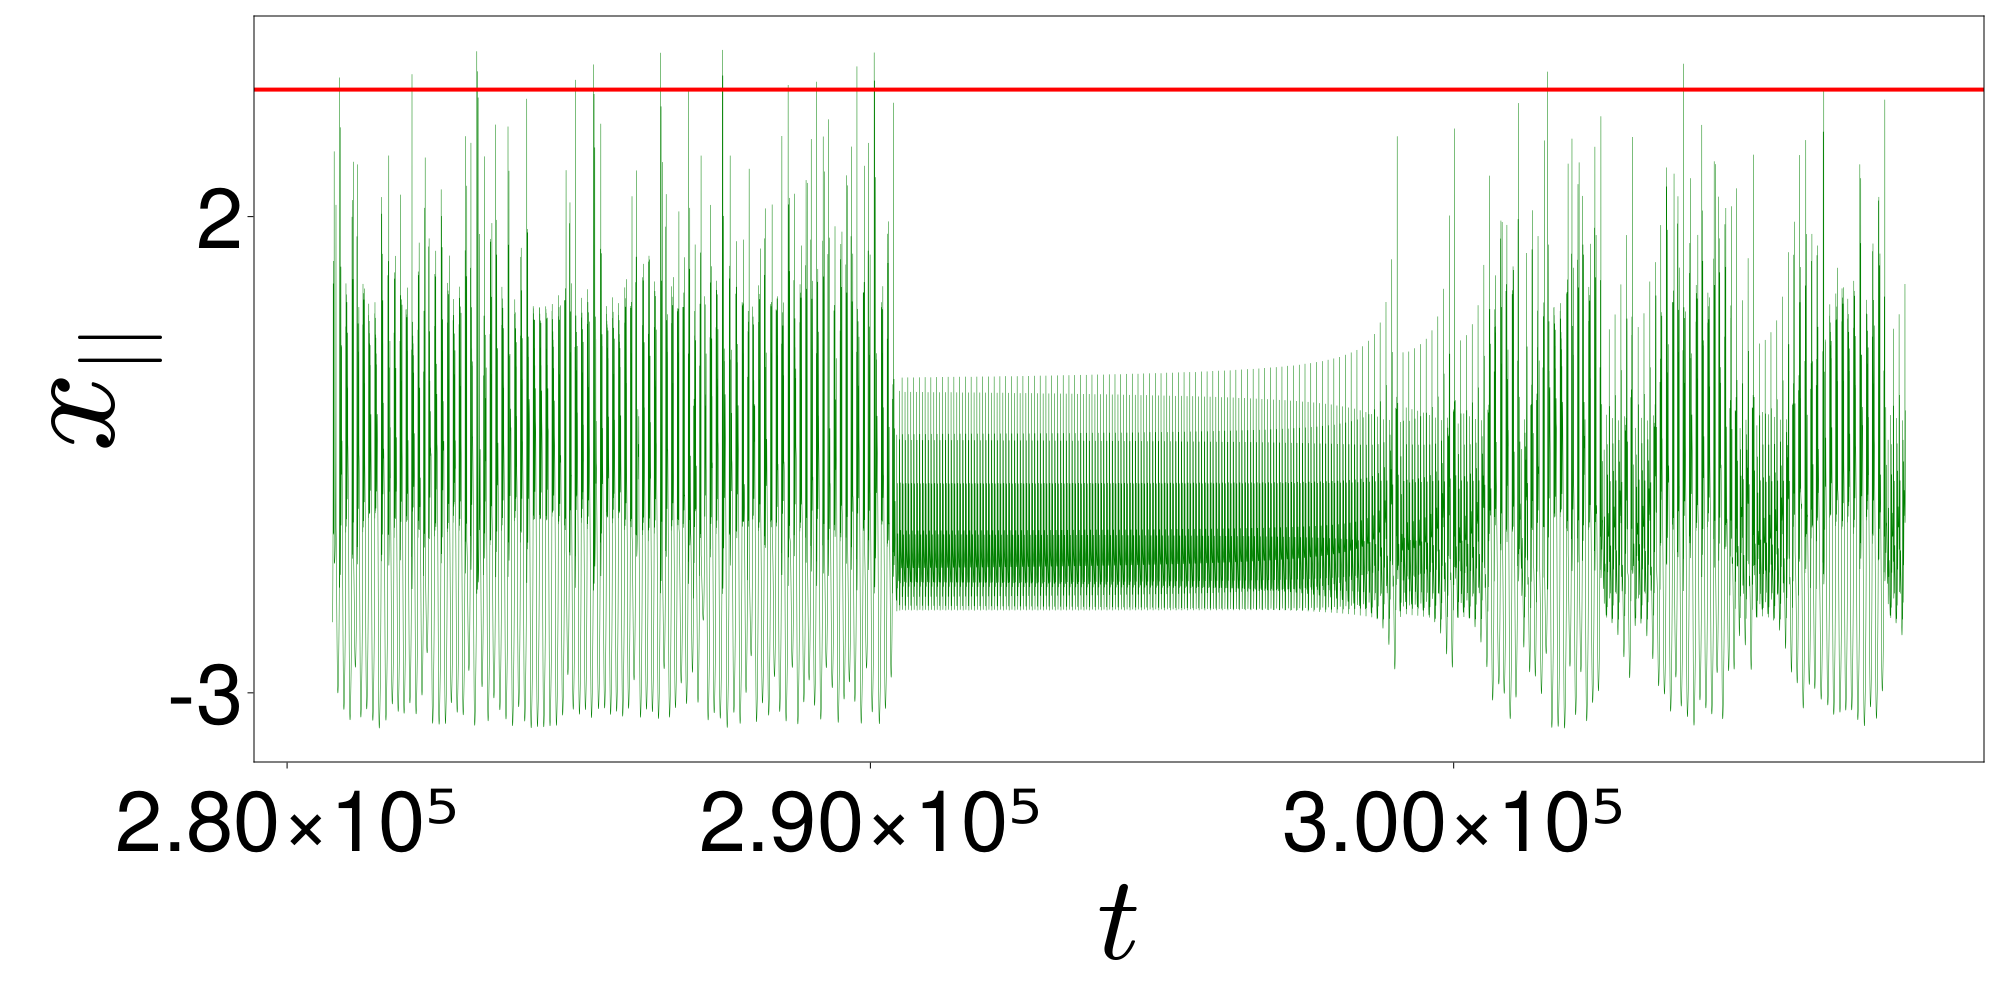

In [33]:
f = Figure(resolution = (2000, 1000))

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}",
xlabelsize = 120, ylabelsize = 140,
                xticklabelsize = 85, yticklabelsize = 85, yticks = [-3, 2])
ax.xgridvisible = false
ax.ygridvisible = false

lines!(ax, time[500000:900000], xsum[500000:900000], linewidth = 0.5, color = "green")
hlines!(Hs_, color = "red", linewidth = 4.0)

save("intermittency_timeseries.eps", f)
f

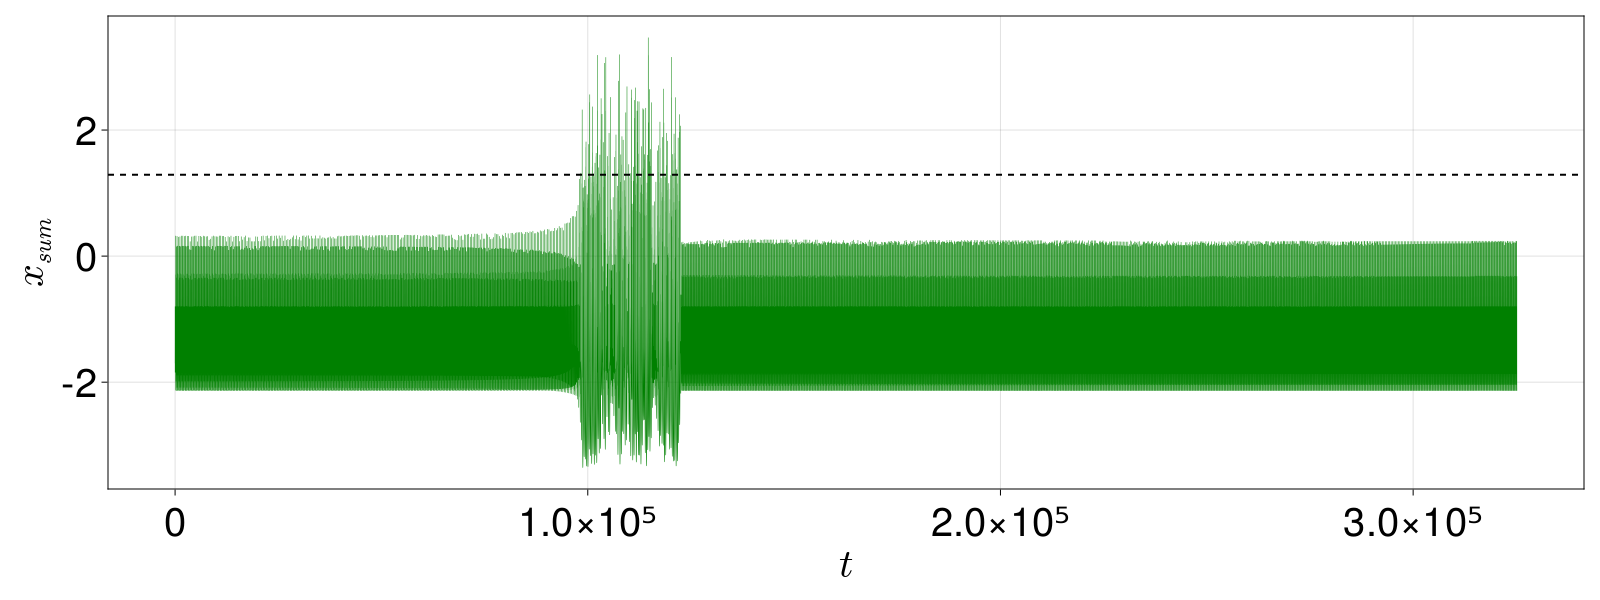

In [35]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax, xsum[1:end], linewidth = 0.5, color = "green")
hlines!(Hs_, color = "black", linewidth = 2.0, linestyle = :dash)
f

In [ ]:
ts, tf = 1524371, 2524371

f = Figure(resolution = (2500, 2500), dpi = 300)
ax = Axis3(f[1, 1],
xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 100, ylabelsize = 100, zlabelsize = 100,
xticklabelsize = 50, yticklabelsize = 50, zticklabelsize = 50,
zticks = range(3.6, 4.2, step = 0.2))
lines!(ax, sol[1, ts:tf], sol[2, ts:tf], sol[3, ts:tf], linewidth = 1.5, color = "blue" )
f

In [ ]:
ds = ContinuousDynamicalSystem(HR, condition, p)

In [ ]:
LES = lyapunovspectrum(ds, tspan[2]; Ttr = tspan[2]/4, Δt = 1,
                        diffeq = (alg = Vern9(), adaptive = false, dense = false, dt = 0.001)
)
    

In [ ]:
LES = lyapunovspectrum(ds, tspan[2]; Ttr = tspan[2]/4)
    